# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
## Load pickled data
import pickle

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
labels_index = np.unique(y_train)
n_labels = len(labels_index)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of labels/classes =", n_labels)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of labels/classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

label index:  12


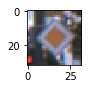

In [5]:
## Show random image and label index

import random
import matplotlib.pyplot as plt 

# Show visualizations in the notebook
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print('label index: ', y_train[index])

#### Complete set of images and labels

In [6]:
## Create label dictionary {label:signname}

import csv
    
labels_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels_dict = {int(rows[0]):rows[1] for rows in reader}

In [7]:
print(labels_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


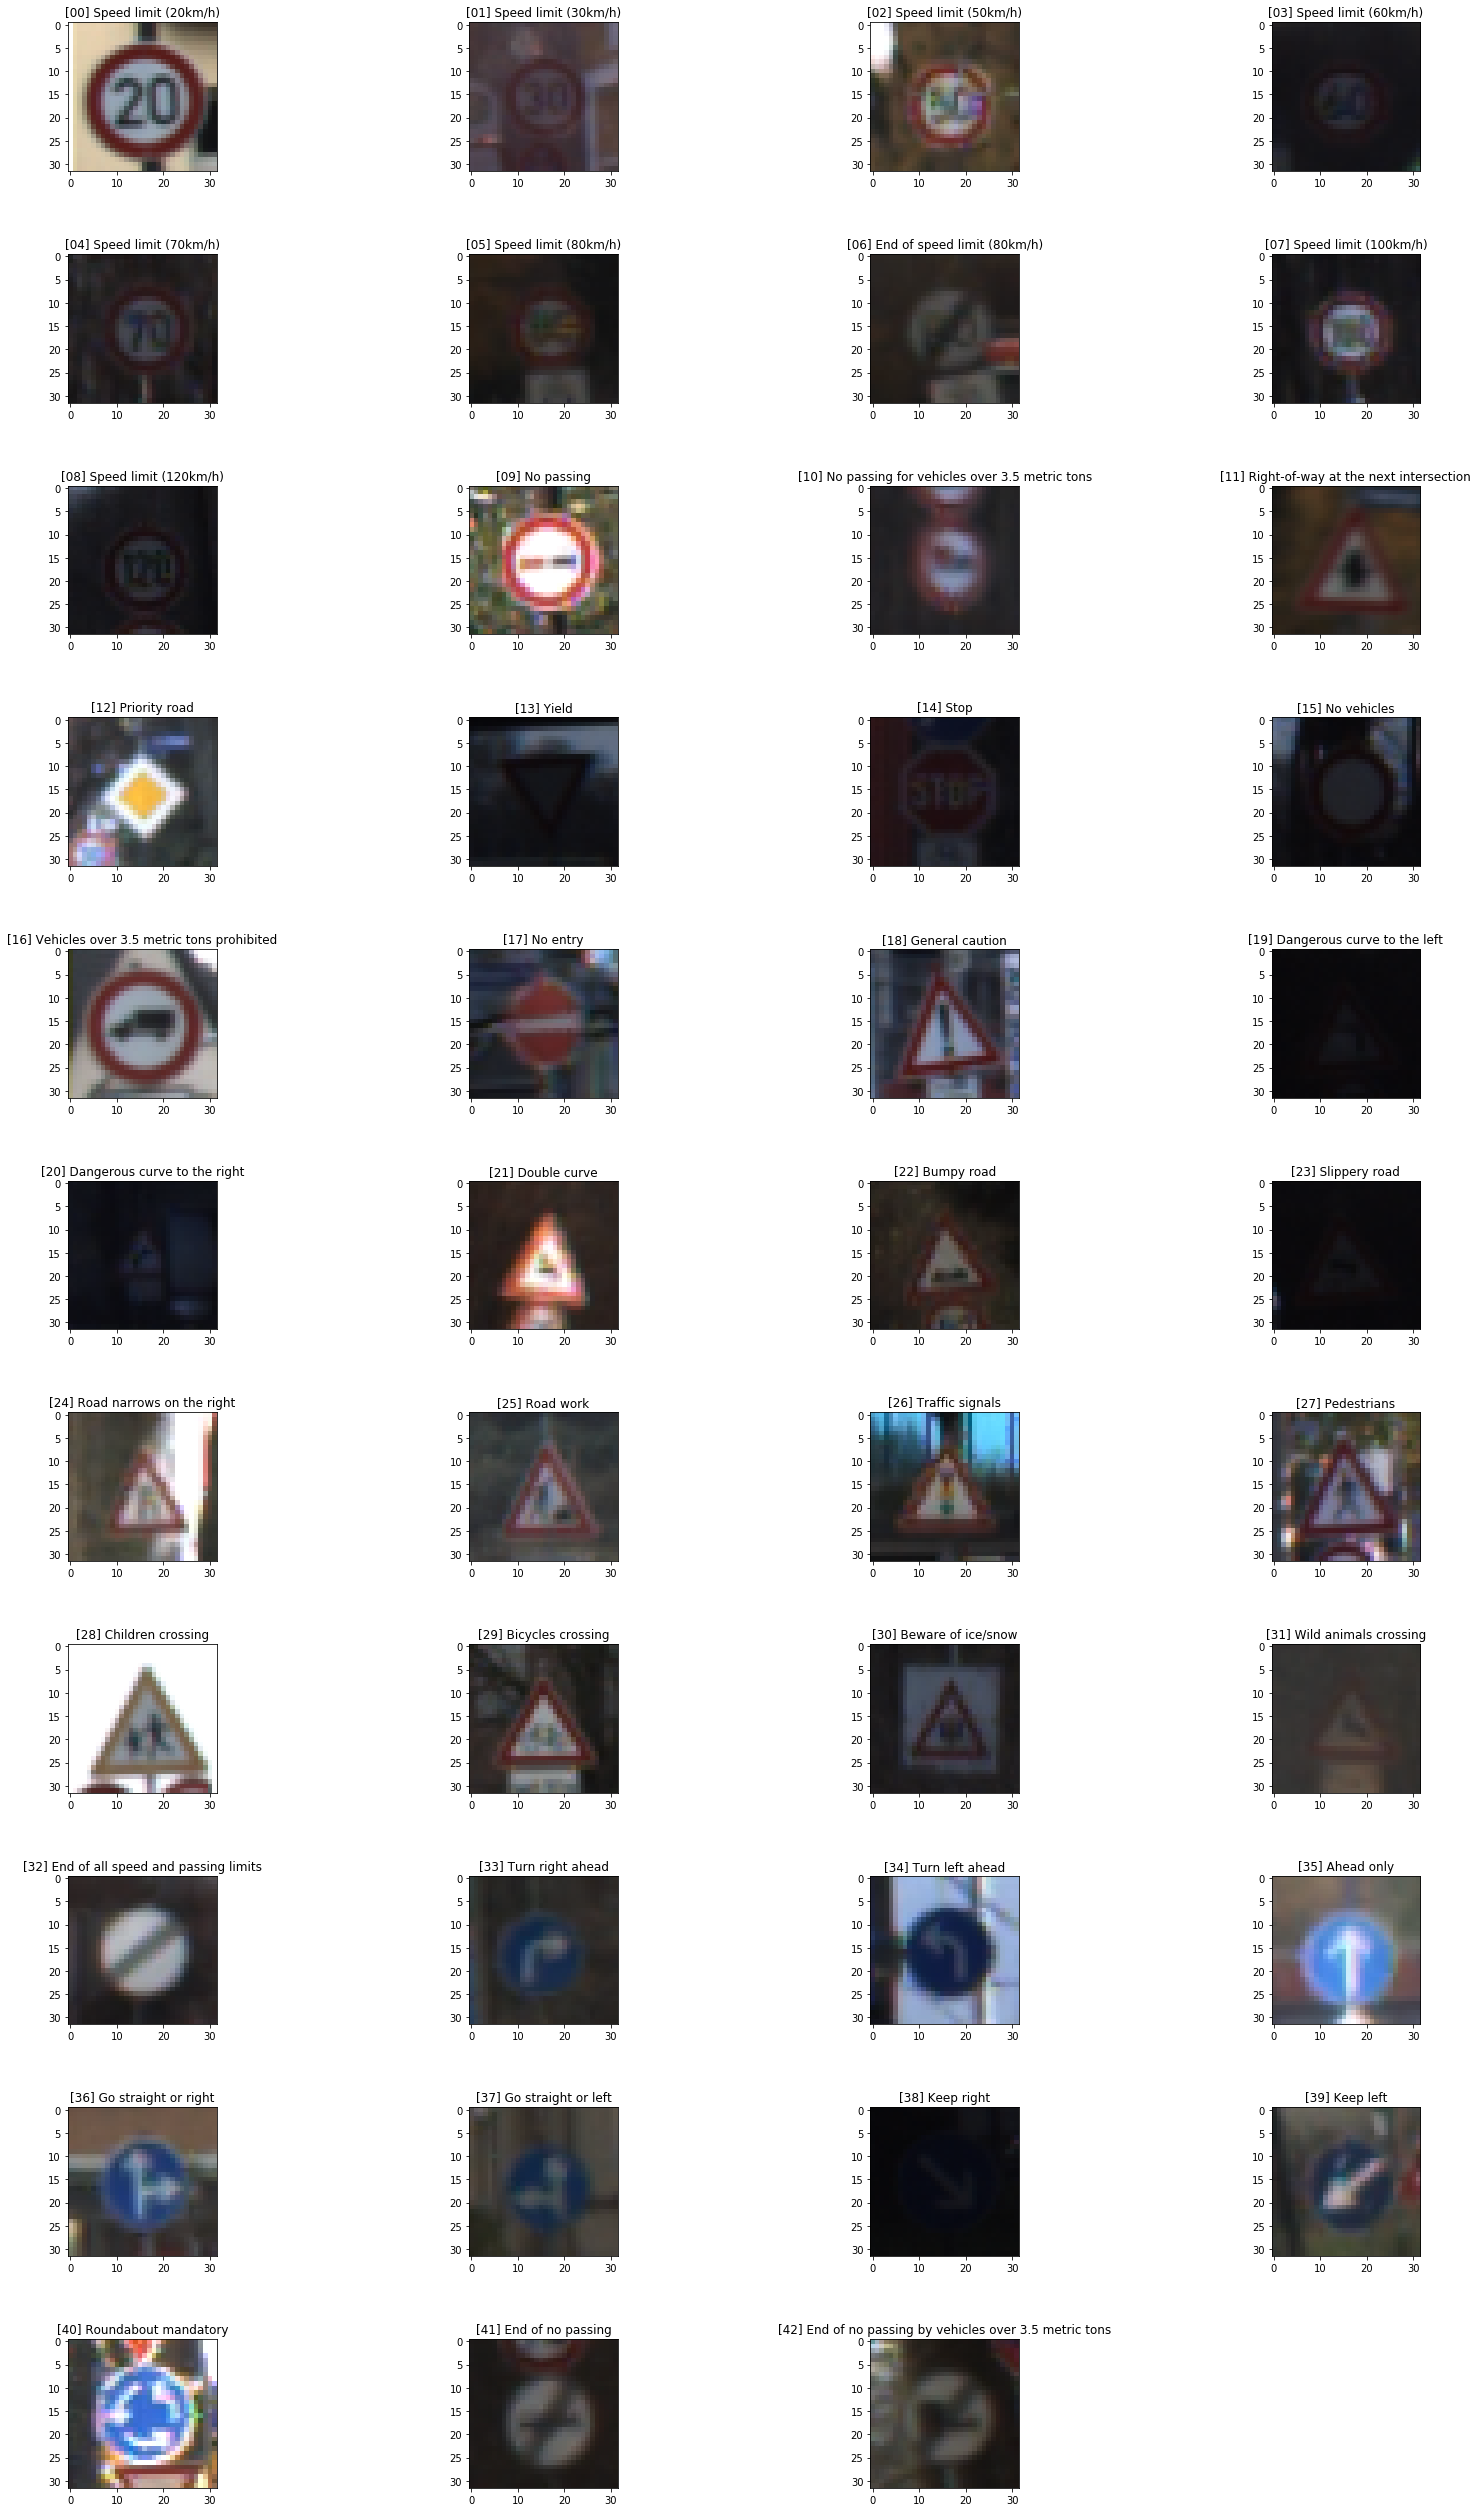

In [8]:
## Display sample of original training images (BEFORE preprocessing)

fig = plt.figure(figsize=(22,35), tight_layout={'h_pad':5})

for i in range(n_labels):
    image_key = np.where(y_train==i)
    img = X_train[image_key[0][0]]
    ax = fig.add_subplot(int(n_labels/4)+1,4,i+1) 
    ax.imshow(img, interpolation='none')
    plt.title("[%02d] %s" % (i, labels_dict[y_train[image_key[0][0]]]))
plt.show()

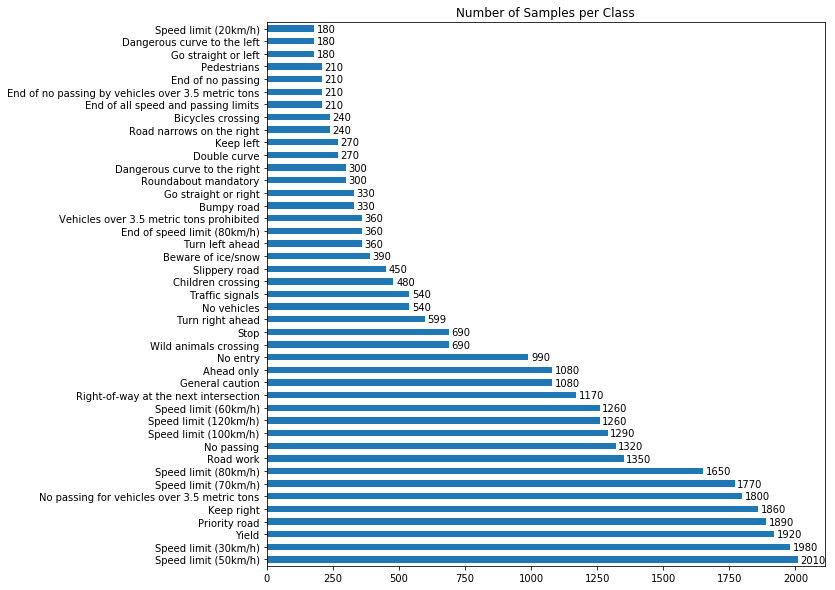

In [9]:
## Display label distribution in a histogram

import pandas as pd

y_train_df = pd.DataFrame()
y_train_df['label'] = y_train
ax = y_train_df['label'].value_counts().plot(kind='barh', figsize = (10,10), title='Number of Samples per Class')
ax.set_yticklabels(list(map(lambda x: labels_dict[x], y_train_df['label'].value_counts().index.tolist())))            
for i, v in enumerate(y_train_df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='black')

In [10]:
## Display labels in a table

labels_i = [[i, sum(y_train == i)] for i in range(len(np.unique(y_train)))]
# labels_i_sorted = sorted(labels_i, key=lambda x: x[1])

data_pd = pd.read_csv('signnames.csv')
labels_pd = data_pd.set_index('ClassId')

# data_pd['Count'] = pd.Series(np.asarray(labels_i_sorted).T[1], index=np.asarray(labels_i_sorted).T[0])
labels_pd['Count'] = pd.Series(np.asarray(labels_i).T[1], index=np.asarray(labels_i).T[0])

labels_pd

,SignName,Count
ClassId,,
0,Speed limit (20km/h),180
1,Speed limit (30km/h),1980
2,Speed limit (50km/h),2010
3,Speed limit (60km/h),1260
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
6,End of speed limit (80km/h),360
7,Speed limit (100km/h),1290
8,Speed limit (120km/h),1260


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

**My approach:**
- normalization will be handled within the network
- data augmentation will include grayscaling and affine transformations

#### Normalization

In [11]:
from tqdm import tqdm
from skimage import color, data, exposure

# Apply normalization and local contrast enhancement

def normalize(image_data):
    '''Contrast Limited Adaptive Histogram Equalization (CLAHE). In addition to regular normalization, 
    this function provides local contrast enhancement -- i.e., details of the image can be 
    enhanced even in regions that are darker or lighter than most of the image.
    http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist
    '''
    
    norm = np.array([exposure.equalize_adapthist(image, clip_limit=0.1) for image in tqdm(image_data)])
    return norm


print('Normalizing Training Images...')
X_train_norm = normalize(X_train)

print('Normalizing Validation Images...')
X_valid_norm = normalize(X_valid)

print('\nNormalizing Test Images...')
X_test_norm = normalize(X_test)
    

  0%|          | 0/34799 [00:00<?, ?it/s]/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
  0%|          | 5/34799 [00:00<11:44, 49.42it/s]

Normalizing Training Images...


  0%|          | 6/4410 [00:00<01:25, 51.70it/s]

Normalizing Validation Images...


  0%|          | 6/12630 [00:00<04:02, 52.12it/s]


Normalizing Test Images...


100%|██████████| 12630/12630 [04:04<00:00, 51.12it/s]


label index:  4


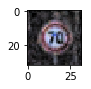

In [12]:
## Show an example of a normalized image

import random
import matplotlib.pyplot as plt 

# Show visualizations in the notebook
%matplotlib inline

index = random.randint(0, len(X_train_norm))
image = X_train_norm[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print('label index: ', y_train[index])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


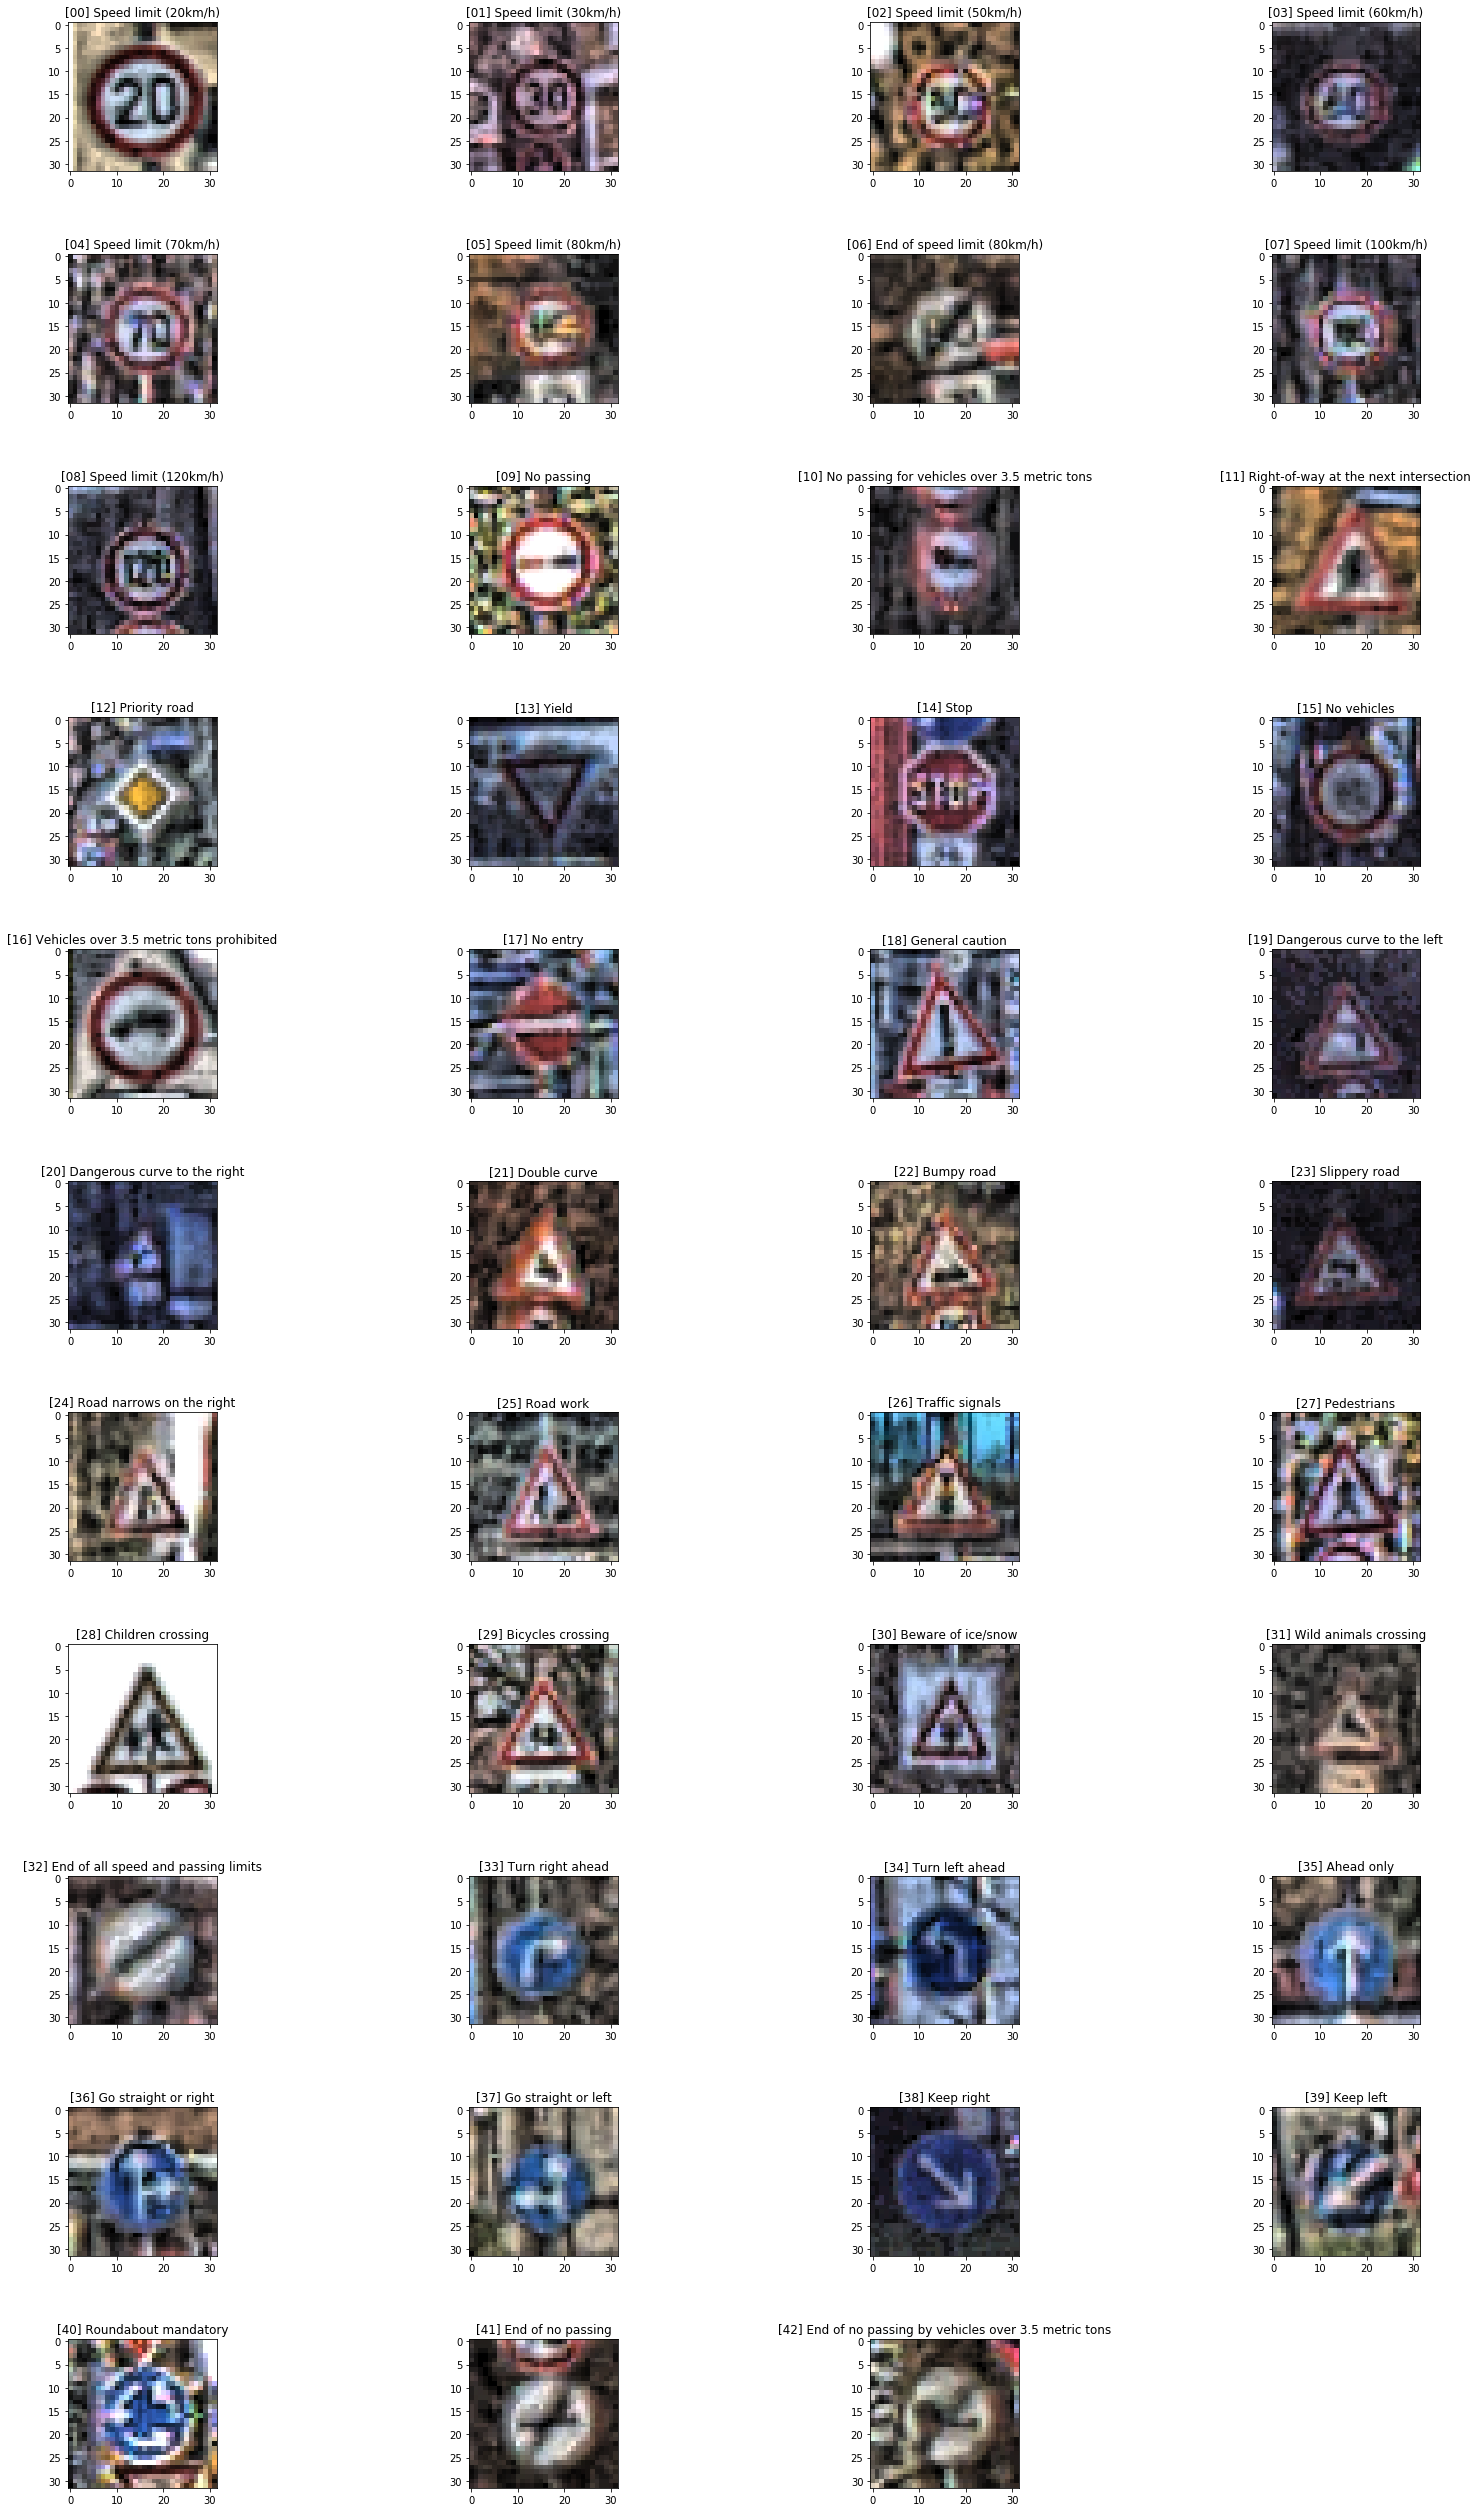

In [77]:
## Display sample of normalized training images

fig = plt.figure(figsize=(22,35), tight_layout={'h_pad':5})

for i in range(n_labels):
    image_key = np.where(y_train==i)
    img = X_train_norm[image_key[0][0]]
    ax = fig.add_subplot(int(n_labels/4)+1,4,i+1) 
    ax.imshow(img, interpolation='none')
    plt.title("[%02d] %s" % (i, labels_dict[y_train[image_key[0][0]]]))
plt.show()

#### Data Augmentation

Generates batches of tensor image data that is augmented based on a chosen set of tranformation parameters (e.g. rotation, shift, shear, zoom).

In [13]:
## Apply affine and color transformations 

import keras
from keras.preprocessing.image import ImageDataGenerator

# Transformations applied to RBG training images
datagen = keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)


Using TensorFlow backend.


In [14]:
## Create augmented training sets

from sklearn.utils import shuffle

max_images_per_class = 6000
X_train_aug = np.empty((0, 32, 32, 3))
y_train_aug = np.empty(0, dtype='uint8')

print('Augmenting Image Data...')
for i in tqdm(range(n_labels)):
    index = [y_train==i]
    i_class_images = X_train_norm[y_train==i]
    i_class_y = y_train[y_train==i]

    i_X_train_aug = np.copy(i_class_images)
    i_y_train_aug = np.copy(i_class_y)

    for X,y in datagen.flow(i_class_images, i_class_y, batch_size=len(i_class_y), seed=113+i*17):            
        i_X_train_aug = np.append(i_X_train_aug, X, axis=0)
        i_y_train_aug = np.append(i_y_train_aug, y, axis=0)

        if len(i_X_train_aug) >= max_images_per_class:
            break

    X_train_aug = np.append(X_train_aug, i_X_train_aug[:max_images_per_class], axis=0)
    y_train_aug = np.append(y_train_aug, i_y_train_aug[:max_images_per_class], axis=0)              

X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug, random_state=113)

print('Augmentation Complete.')



  0%|          | 0/43 [00:00<?, ?it/s]

Augmenting Image Data...


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/preprocessing/image.py:482: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
100%|██████████| 43/43 [03:22<00:00,  6.18s/it]


Augmentation Complete.


In [15]:
print('new number of training images: ', X_train_aug.shape[0])
print('verify image shape: ', X_train_aug.shape[1:])

new number of training images:  258000
verify image shape:  (32, 32, 3)


label index:  2


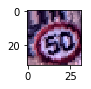

In [16]:
## Show example of augmented image and label index

import random
import matplotlib.pyplot as plt 

# Show visualizations in the notebook
%matplotlib inline

index = random.randint(0, len(X_train_aug))
image = X_train_aug[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print('label index: ', y_train_aug[index])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


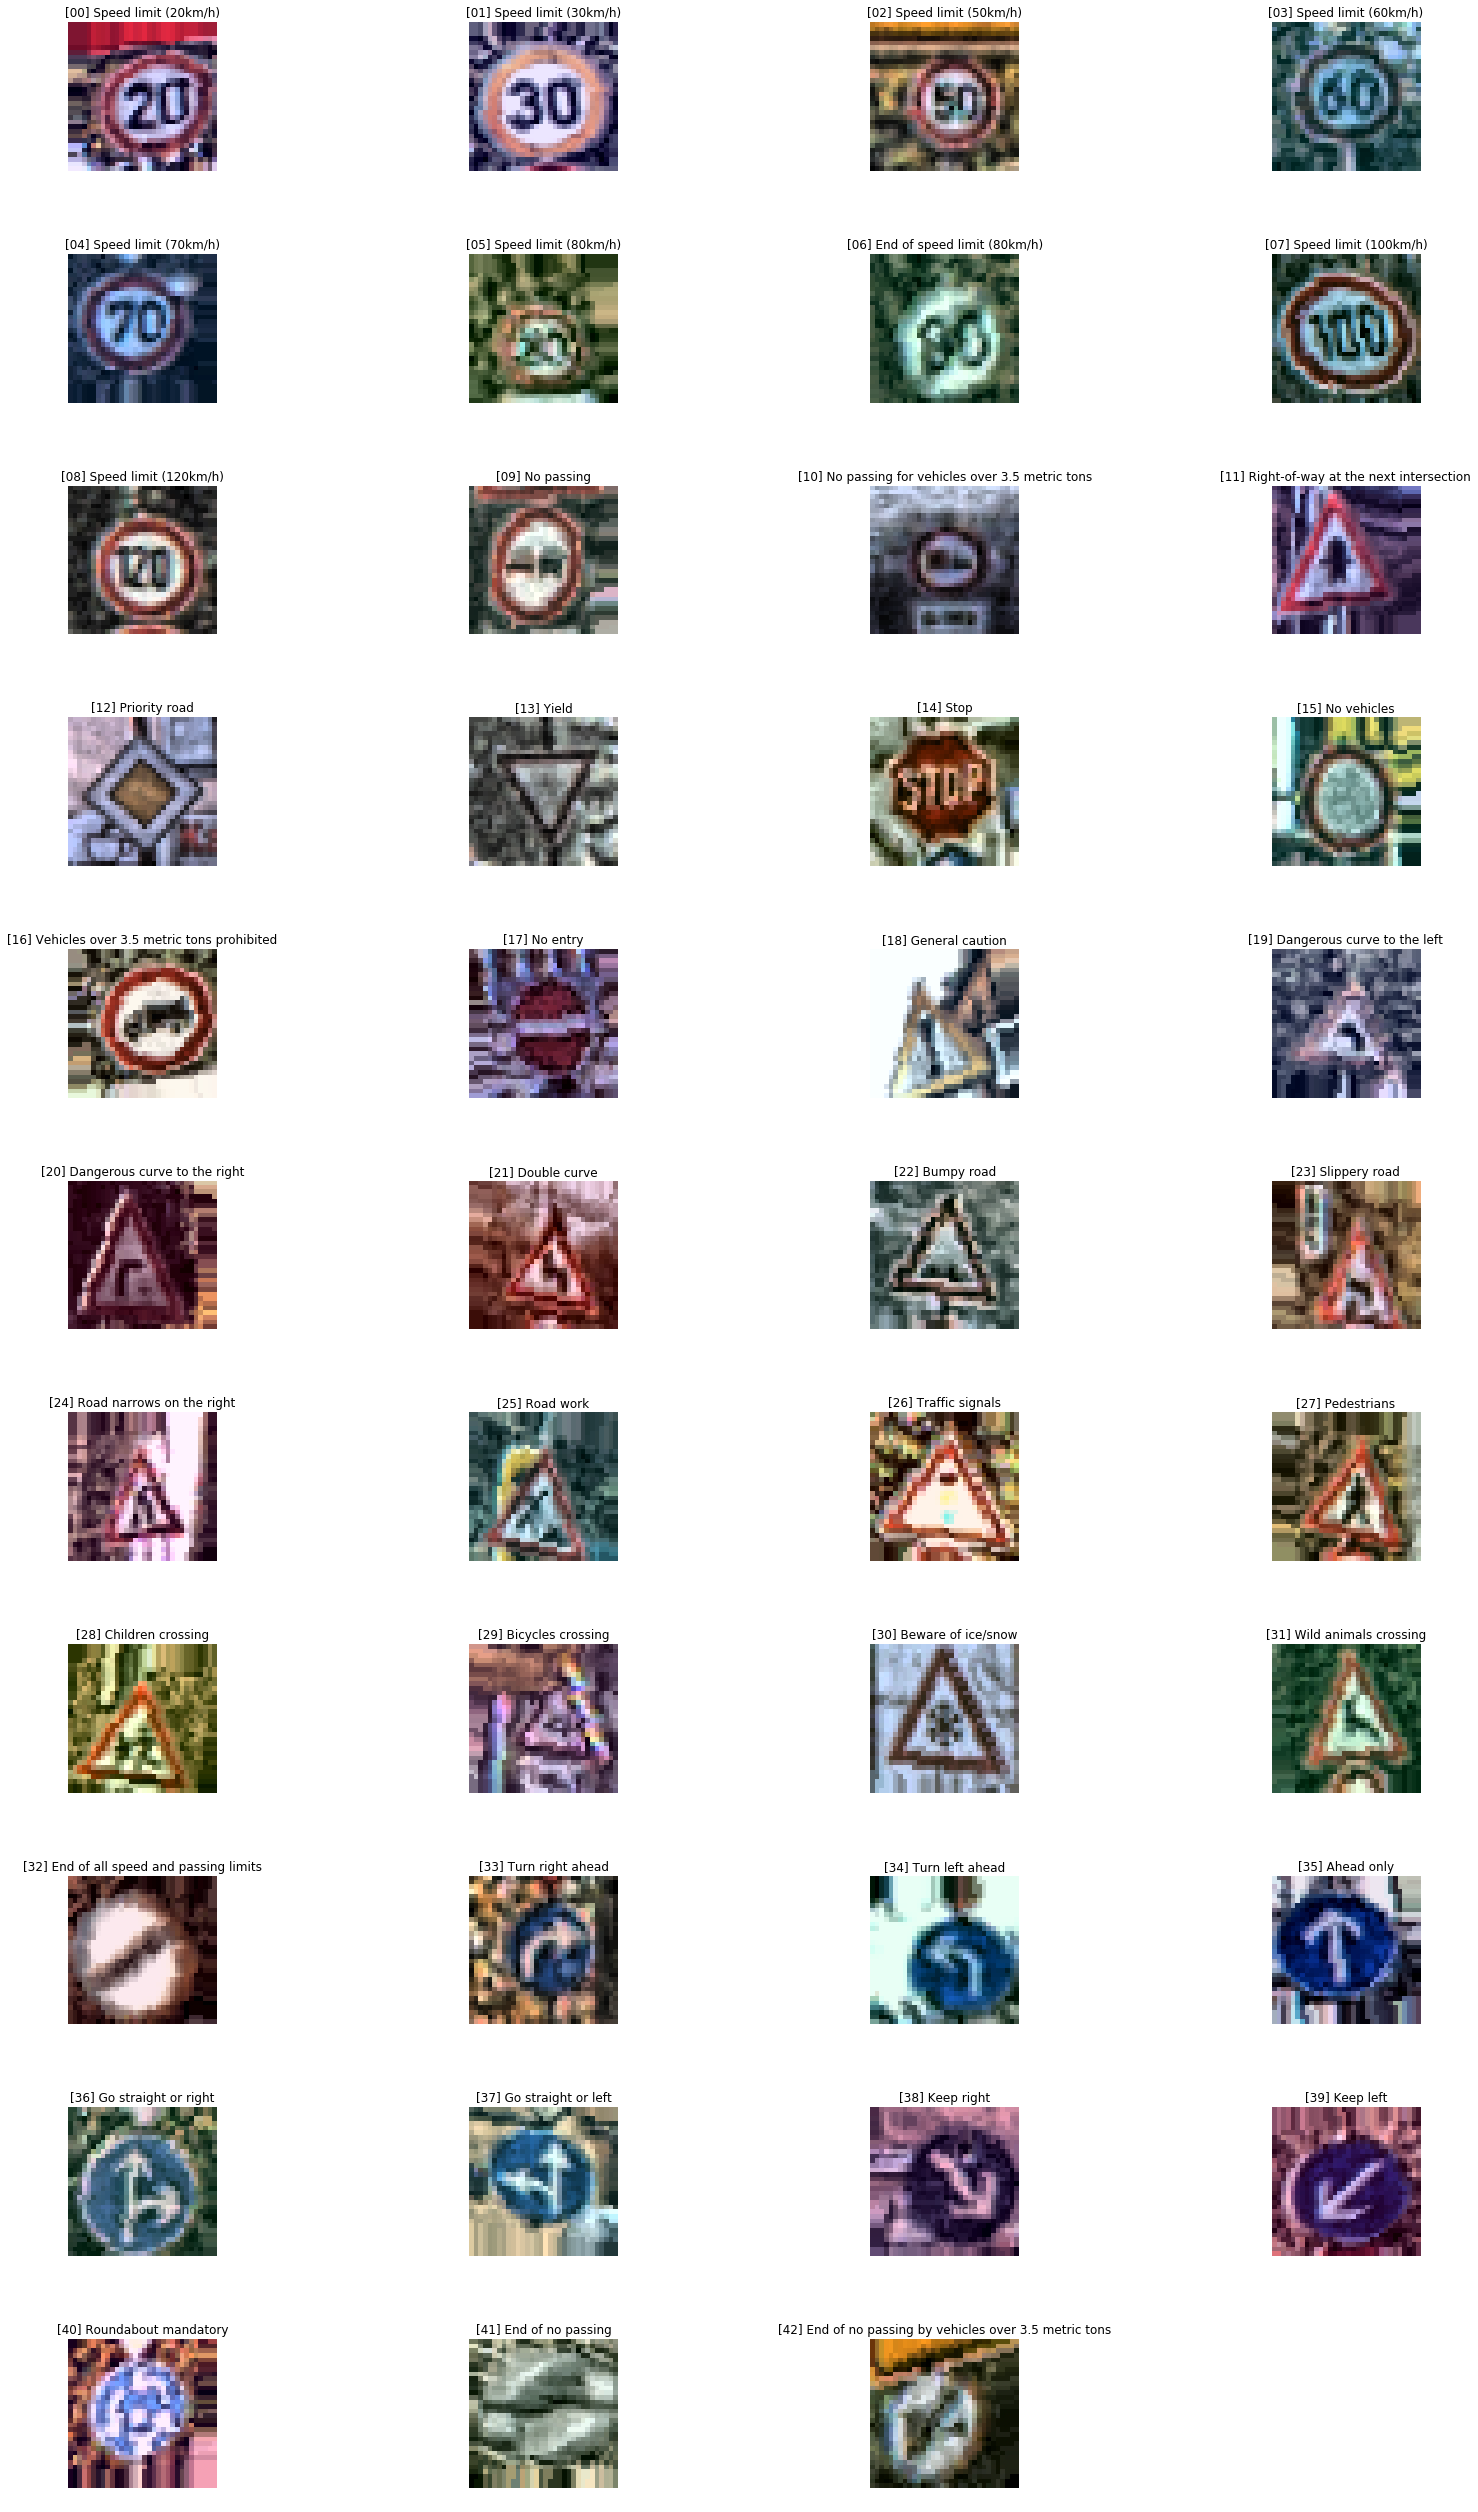

In [17]:
## Display sample of the now augmented training images

fig = plt.figure(figsize=(22,35), tight_layout={'h_pad':5})

for i in range(n_labels):
    image_key = np.where(y_train_aug==i)
    img = X_train_aug[image_key[0][0]]
    ax = fig.add_subplot(int(n_labels/4)+1,4,i+1) 
    ax.imshow(img, interpolation='none')
    plt.title("[%02d] %s" % (i, labels_dict[y_train_aug[image_key[0][0]]]))
    plt.axis('off')
plt.show()

#### Grayscale

In [41]:
## Create grayscale training sets

from sklearn.utils import shuffle

max_images_per_class = 10
X_train_gray = np.empty((32, 32))
y_train_gray = np.empty(0, dtype='uint8')

print('Grayscaling Image Data...')
# for i in tqdm(range(n_labels)):
for i in tqdm(range(2)):
    index = [y_train_aug==i]
    print('index: ', index)
    i_class_images = X_train_aug[y_train_aug==i]
    print('i_class_images shape: ', i_class_images.shape)
    i_class_y = y_train_aug[y_train_aug==i]
    print('i_class_y shape: ', i_class_y.shape)

#     i_X_train_gray = np.copy(i_class_images)
#     i_y_train_gray = np.copy(i_class_y)
    i_X_train_gray = np.empty((32, 32))
    print('i_X_train_gray shape: ', i_X_train_gray.shape)
    i_y_train_gray = np.empty(0, dtype='uint8')
    print('i_y_train_gray shape: ', i_y_train_gray.shape)

#     for X,y in datagen.flow(i_class_images, i_class_y, batch_size=len(i_class_y), seed=113+i*17):
#     for image_rgb in i_class_images:
    for ii in range(0, len(i_class_y)):
        image_gray = color.rgb2gray(i_class_images[ii])
        print('image_rgb shape: ', image_rgb.shape)
        print('image_gray shape: ', image_gray.shape)
        i_X_train_gray = np.append(i_X_train_gray, image_gray, axis=0)
        print('i_class_y[ii] shape: ', i_class_y[ii].shape)
        print('i_class_y[ii] value: ', [i_class_y[ii]])
        
        i_y_train_gray = np.append(i_y_train_gray, [i_class_y[ii]], axis=0)

        if len(i_X_train_gray) >= max_images_per_class:
            break

    X_train_gray = np.append(X_train_gray, i_X_train_gray[:max_images_per_class], axis=0)
    y_train_gray = np.append(y_train_gray, i_y_train_gray[:max_images_per_class], axis=0)              

X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray, random_state=113)

print('Grayscaling Complete.')




100%|██████████| 2/2 [00:00<00:00, 20.16it/s]

Grayscaling Image Data...
index:  [array([False, False, False, ..., False, False, False], dtype=bool)]
i_class_images shape:  (6000, 32, 32, 3)
i_class_y shape:  (6000,)
i_X_train_gray shape:  (32, 32)
i_y_train_gray shape:  (0,)
image_rgb shape:  (32, 32, 3)
image_gray shape:  (32, 32)
i_class_y[ii] shape:  ()
i_class_y[ii] value:  [0]
index:  [array([False, False, False, ..., False, False, False], dtype=bool)]
i_class_images shape:  (6000, 32, 32, 3)
i_class_y shape:  (6000,)
i_X_train_gray shape:  (32, 32)
i_y_train_gray shape:  (0,)
image_rgb shape:  (32, 32, 3)
image_gray shape:  (32, 32)
i_class_y[ii] shape:  ()
i_class_y[ii] value:  [1]


ValueError: Found input variables with inconsistent numbers of samples: [52, 2]

In [37]:
i_class_y[3000]

0

In [ ]:
## Display original vs. normalized vs. grayscale versions

index = random.randint(0, len(X_train_norm))

image_orig = X_train[index].squeeze()
image_norm = X_train_norm[index].squeeze()
image_gray = X_train_gray[index]
# image_gray = color.rgb2gray(image_rgb)

plt.figure(figsize=(3,3))

plt.subplot2grid((1, 3), (0, 1));
plt.axis('off')
plt.imshow(image_orig, cmap="gray")

plt.subplot2grid((1, 3), (0, 1));
plt.axis('off')
plt.imshow(image_norm, cmap="gray")

plt.subplot2grid((1, 3), (0, 2));
plt.axis('off')
plt.imshow(image_gray, cmap="gray")
print('label index: ', y_train[index])

In [ ]:
# Create image dictionary {label:images}

train_images_dict = dict()

for i, (image, label) in enumerate(zip(X_train_aug, y_train_aug)):
    if label not in train_images_dict:
        train_images_dict[label] = []
    train_images_dict[label].append(image)

In [ ]:
# Verify that number of images in dict is correct
sum(len(v) for v in train_images_dict.values())

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

images_labels = list(train_images_dict.keys())
for image_key in images_labels:        
    subplots = 12
    fig, axes = plt.subplots(1,subplots)
    images_total = len(train_images_dict[image_key])
    print(images_total)
    offset = images_total // subplots
    images = [train_images_dict[image_key][j*offset] for j in range(subplots)]
    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.set_title(image_key)
        ax.imshow(image.squeeze())
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

train_images_dict.clear()

### Model Architecture

In [81]:
## Global variables

LOG_DIR = ".logs"
MODEL_DIR = ".models"

EPOCHS = 20
BATCH_SIZE = 128

lr = 0.001      # learning rate
decay= 0.0005   # for L2 reg
keep_prob = 0.5 # (1 - dropout)
mu = 0          # normalized mean
sigma = 0.1     # normalized stdev

#### Operations

The series of functions below are designed to make the model more modular. This reduces the amount of hard-coding and makes it much easier to experiment with different model architectures.

In [8]:
# applies max pooling
def max_pool(input, kernel_size=(1,1), strides=[1,1,1,1], name="maxpool"):
    H = kernel_size[0]
    W = kernel_size[1]
    print('{}: {}x{} / {}'.format(name, H, W, strides[1]))
    
    with tf.name_scope(name):    
        pool = tf.nn.max_pool(input, ksize=[1, H, W, 1], strides=strides, padding='VALID', name=name)
        return pool

In [18]:
# Creates convolutional layer
def conv_layer(input, n_kernels=1, kernel_size=(1, 1), strides=[1, 1, 1, 1], name="conv"):
    H, W = kernel_size                  # filter height, width
    C = input.get_shape().as_list()[3]  # input depth
    K = n_kernels                       # output depth
    in_shape = [H, W, C, K]
    print('{} filter shape: {}'.format(name, in_shape))
    
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal(in_shape, mean=mu, stddev=sigma), name="weights")
        b = tf.Variable(tf.zeros(K), name="biases")
        conv = tf.nn.conv2d(input, w, strides=strides, padding='SAME')
        conv = tf.nn.bias_add(conv, b)
        out_shape = conv.get_shape().as_list()
        print('{} output shape: {}'.format(name, out_shape))
        return conv


# Creates fully connected layer
def fc_layer(input, n_inputs, n_outputs, name="fc"):
    shape = input.get_shape().as_list()
    print('{} shape: inputs={} outputs={}'.format(name, shape[1], n_outputs))
    
    with tf.name_scope(name):    
        w = tf.Variable(tf.truncated_normal([n_inputs, n_outputs], mean=mu, stddev=sigma), name="weights")
        b = tf.Variable(tf.zeros(n_outputs), name="biases")
        act = tf.matmul(input, w) + b
        return act

#### Modified LeNet Models

In [75]:
def LeNet_5(x):
    
    with tf.name_scope("conv_layers"):
        conv = tf.nn.relu(conv_layer(x, n_kernels=3, kernel_size=(1, 1), strides=[1, 1, 1, 1], name="conv_0"))  
        
        conv = tf.nn.relu(conv_layer(conv, n_kernels=8, kernel_size=(5, 5), strides=[1, 1, 1, 1], name="conv_1"))  
        conv = tf.nn.relu(conv_layer(conv, n_kernels=16, kernel_size=(5, 5), strides=[1, 1, 1, 1], name="conv_2"))   
        conv = max_pool(conv, kernel_size=(2,2), strides=[1,2,2,1])    

        conv = tf.nn.relu(conv_layer(conv, n_kernels=16, kernel_size=(5, 5), strides=[1, 1, 1, 1], name="conv_3"))  
        conv = tf.nn.relu(conv_layer(conv, n_kernels=32, kernel_size=(5, 5), strides=[1, 1, 1, 1], name="conv_4"))   
        conv = max_pool(conv, kernel_size=(2,2), strides=[1,2,2,1])  

        conv = tf.nn.relu(conv_layer(conv, n_kernels=32, kernel_size=(5, 5), strides=[1, 1, 1, 1], name="conv_5"))  
        conv = tf.nn.relu(conv_layer(conv, n_kernels=64, kernel_size=(5, 5), strides=[1, 1, 1, 1], name="conv_6"))   
        conv = max_pool(conv, kernel_size=(2,2), strides=[1,2,2,1])          
        
    flat = tf.contrib.layers.flatten(conv)  #  =[batch_size, k_features]  
    flat_shape = flat.get_shape().as_list()
    k_features = flat_shape[1]
    print('flat layer dim: ', flat_shape)
        
    with tf.name_scope("fc_layers"):
        fc = fc_layer(flat, n_inputs=k_features, n_outputs=1024, name="fc_1")
        fc = tf.nn.relu(fc)
        fc = tf.nn.dropout(fc, keep_prob)
    
        fc = fc_layer(fc, n_inputs=1024, n_outputs=512, name="fc_2")
        fc = tf.nn.relu(fc)    
        fc = tf.nn.dropout(fc, keep_prob)
    
        logits = fc_layer(fc, n_inputs=512, n_outputs=43, name="output")
    
        return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Loss Functions

In [78]:
# L2 regularization
def l2_reg(decay):
    train_vars = tf.trainable_variables() 
    with tf.name_scope("L2"):
        l2 = tf.add_n([tf.nn.l2_loss(v) for v in train_vars if 'weight' in v.name]) * decay
        return l2


# cross entropy
def cross_entropy(logits, one_hot_y):
    with tf.name_scope("xent"):
        xent = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y))
        tf.summary.scalar("xent", xent)
        return xent

    
# training
def train_step(lr, xent):
    with tf.name_scope("train"):
        train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(xent + l2)
        return train_step

    
# accuracy
def accuracy(logits, one_hot_y):
    with tf.name_scope("accuracy"):
        pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        acc = tf.reduce_mean(tf.cast(pred, tf.float32))
        tf.summary.scalar("accuracy", acc)
        return acc

In [61]:
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_acc = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_acc = sess.run(acc, feed_dict={x: batch_x, y: batch_y})
        total_acc += (batch_acc * len(batch_x))
    final_acc = total_acc / num_examples
    return final_acc

In [82]:
# construct the graph 
import tensorflow as tf

tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = LeNet_5(x) 
l2 = l2_reg(decay)
xent = cross_entropy(logits, one_hot_y)
train = train_step(lr, xent)
acc = accuracy(logits, one_hot_y)

print('Verify Network Structure:\n--------------')

conv_0 in shape: [1, 1, 3, 3]
conv_0 out shape: [None, 32, 32, 3]
conv_1 in shape: [5, 5, 3, 8]
conv_1 out shape: [None, 32, 32, 8]
conv_2 in shape: [5, 5, 8, 16]
conv_2 out shape: [None, 32, 32, 16]
conv_3 in shape: [5, 5, 16, 16]
conv_3 out shape: [None, 16, 16, 16]
conv_4 in shape: [5, 5, 16, 32]
conv_4 out shape: [None, 16, 16, 32]
conv_5 in shape: [5, 5, 32, 32]
conv_5 out shape: [None, 8, 8, 32]
conv_6 in shape: [5, 5, 32, 64]
conv_6 out shape: [None, 8, 8, 64]
k_features:  1024
fc_1 shape: in=1024 out=1024
fc_2 shape: in=1024 out=512
output shape: in=512 out=43


In [ ]:
### Tensorboard Example ###

# Tensorboard Summary
summaries = list()

# Histogram Summary: Weights
summaries.append(tf.summary.histogram("Weights_l1_summary", weights['l1']))
summaries.append(tf.summary.histogram("Weights_l2_summary", weights['l2']))

# Histogram Summary: Biases
summaries.append(tf.summary.histogram("Biases_L1", biases['l1']))
summaries.append(tf.summary.histogram("Biases_L2", biases['l2']))

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Scalar Summary: Cost and Accuracy
summaries.append(tf.summary.scalar("cost", loss_op))
summaries.append(tf.summary.scalar("accuracy", accuracy_op))



In [ ]:
# Training and accuracy test on augmented data set

# merged_summary_op = tf.summary.merge(summaries)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
    saver = tf.train.Saver()
    num_examples = len(X_train_aug)

    print("Training...\n--------")
    for i in range(EPOCHS):
        step = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            step += 1
            start = offset
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[start:end], y_train_aug[start:end]
            sess.run(train, feed_dict={x: batch_x, y: batch_y})
            if step % 400 == 0:
                batch_acc = sess.run(acc, feed_dict={x: batch_x, y: batch_y})
                print("Epoch {}, Step {}".format(i+1, step))
                print("Training Accuracy = {:.3f}\n".format(batch_acc))
        
        # Calculate validation accuracy 
        valid_accuracy = evaluate(X_valid_norm, y_valid)
        print("Validation Accuracy = {:.3f}\n".format(valid_accuracy))
        print("--------")

#         # TensorBoard: Write Summaries
#         val_summary, val_loss, val_acc = eval_data(sess,
#                                                    X_validation, 
#                                                    one_hot_y_validation, 
#                                                    len(y_validation), 
#                                                    merged_summary_op)        
#         writer.add_summary(val_summary, i*BATCH_SIZE)        
    
    # Calculate test accuracy (run only on final model)
    keep_prob = 1.0
    test_acc = evaluate(X_test_norm, y_test)
    print("\nTest Accuracy = {:.3f}\n".format(test_acc))
    print("--------")
    
    saver.save(sess, MODEL_DIR)
    print("Model saved")

In [ ]:
# Calculate accuracy on test set using latest model
import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(MODEL_DIR))

    test_acc = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_acc))

In [83]:
### GOLD TRAINING RUN on AUGMENTED image set ###

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # , feed_dict = {IS_TRAIN_PHASE : True }
    writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
    saver = tf.train.Saver()
    num_examples = len(X_train_aug)

    print("Training...\n--------")
    for i in range(EPOCHS):
#         X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        step = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            step += 1
            start = offset
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[start:end], y_train_aug[start:end]
            sess.run(train, feed_dict={x: batch_x, y: batch_y})
            if step % 400 == 0:
                batch_acc = sess.run(acc, feed_dict={x: batch_x, y: batch_y})
                print("Epoch {}, Step {}".format(i+1, step))
                print("Training Accuracy = {:.3f}\n".format(batch_acc))
        valid_accuracy = evaluate(X_valid_norm, y_valid)
        print("Validation Accuracy = {:.3f}\n".format(valid_accuracy))
        print("--------")
    saver.save(sess, MODEL_DIR)
    print("Model saved")
    

Training...
--------
Epoch 1, Step 400
Training Accuracy = 0.406

Epoch 1, Step 800
Training Accuracy = 0.867

Epoch 1, Step 1200
Training Accuracy = 0.938

Validation Accuracy = 0.895

--------
Epoch 2, Step 400
Training Accuracy = 0.961

Epoch 2, Step 800
Training Accuracy = 0.969

Epoch 2, Step 1200
Training Accuracy = 0.992

Validation Accuracy = 0.943

--------
Epoch 3, Step 400
Training Accuracy = 0.984

Epoch 3, Step 800
Training Accuracy = 0.984

Epoch 3, Step 1200
Training Accuracy = 1.000

Validation Accuracy = 0.957

--------
Epoch 4, Step 400
Training Accuracy = 1.000

Epoch 4, Step 800
Training Accuracy = 0.984

Epoch 4, Step 1200
Training Accuracy = 0.992

Validation Accuracy = 0.961

--------
Epoch 5, Step 400
Training Accuracy = 0.961

Epoch 5, Step 800
Training Accuracy = 1.000

Epoch 5, Step 1200
Training Accuracy = 1.000

Validation Accuracy = 0.971

--------
Epoch 6, Step 400
Training Accuracy = 0.992

Epoch 6, Step 800
Training Accuracy = 0.984

Epoch 6, Step 1200


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# show cropped images
fig = plt.figure(figsize=(32,32)) # , tight_layout={'h_pad':4})
i = 0
image_dir = 'images/new-signs'
for file in os.listdir(image_dir):
    if '.jpg' in file:
        ax = fig.add_subplot(6,6,i+1) 
        img = mpimg.imread(image_dir + '/' + file)
        ax.imshow(img)
        i+=1
print('\nCropped 32x32 images:\n-----------------------')
plt.show()

# show originals
fig = plt.figure(figsize=(32,32)) #, tight_layout={'h_pad':4})
i = 0
for file in os.listdir(image_dir + '/originals'):
    if '.jpg' in file:
        ax = fig.add_subplot(6,6,i+1) 
        img = mpimg.imread(image_dir + '/originals/' + file)
        ax.imshow(img)
        i+=1
print('\nOriginal source images:\n-----------------------')
plt.show()

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [ ]:
## Preprocess the new images

# Create labels
dir = 'images/new-signs'
new_filenames = os.listdir(dir)
y_new = [n.partition("-")[0] for n in new_filenames if '.jpg' in n]

print('{} new labels created:\n{}'.format(len(y_new), y_new))

# Convert images to np arrays
new_files = [dir + '/' + n for n in new_filenames if '.jpg' in n]
X_new = [mpimg.imread(f) for f in new_files]

print('\n{} new images with shape: {}'.format(len(X_new), X_new[0].shape))

# Normalize the images
print('\nNormalizing new images...')
X_new_norm = normalize(X_new)

print('Done.')

In [ ]:
# Calculate predictions and accuracy for new images

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(MODEL_DIR))
    sess = tf.get_default_session()

    preds = sess.run(tf.nn.softmax(logits), feed_dict={x: X_new_norm})
    print("\nPredicted Classes:")
    preds_list = list(np.argmax(preds,axis=1))
    print(preds_list)
    
    print("vs. Actual Classes:")
    y_new_ints = [int(i) for i in y_new]
    print(y_new_ints)
    
    new_acc = evaluate(X_new_norm, y_new)
    print("\nNew Image Accuracy = {:.3f}\n".format(new_acc))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(MODEL_DIR))
    sess = tf.get_default_session()
    
    pred = tf.nn.softmax(logits)
    k = 3
    topK = tf.nn.top_k(pred, k)
    
    topK_pred = sess.run([pred, topK], feed_dict={x: X_new_norm})
    
    correct_count = 0
    
    print('\n\n               New Input Image:                    Top {} Predictions:'.format(k))
    print("               ___________________________         _______________________________")
    for i in range(0, len(X_new)):
        plt.figure(figsize = (10,1.5))
        
        plt.subplot2grid((1, 3), (0, 0));
        plt.title('[{}]  {}'.format(y_new[i], labels_pd['SignName'][int(y_new[i])]), \
                  {'verticalalignment': 'baseline', 'horizontalalignment': 'left'})        
        plt.axis('off');
        
        plt.subplot2grid((1, 3), (0, 1));
        plt.imshow(X_new[i], interpolation='none');
        plt.axis('off');
        
        plt.subplot2grid((1, 3), (0, 2));
        plt.barh(6-np.arange(k),topK_pred[1][0][i], align='center');
        for i_label in range(k):
            class_id = topK_pred[1][1][i][i_label]
            sign_name = labels_pd['SignName'][topK_pred[1][1][i][i_label]]
            pred_i_label = topK_pred[1][0][i][i_label]
            plt.text(pred_i_label+.02,6-i_label-.25, "[{}]  {}   {:.0%}".format(class_id, sign_name, pred_i_label));
        
        pred_0 = topK_pred[1][1][i][0]
        if int(pred_0) == int(y_new[i]):
            correct_count += 1
            fontdict = {'verticalalignment': 'baseline', 'horizontalalignment': 'left', 'color': 'green'}
            plt.title("* CORRECT *", fontdict)        
        else:
            fontdict = {'verticalalignment': 'baseline', 'horizontalalignment': 'left', 'color': 'red'}
            plt.title("* INCORRECT *", fontdict)        

        plt.axis('off');
        
        plt.show();
    
    acc_rate = correct_count / len(X_new)
    print('Number correct: {}/{} ({:.0%})'.format(correct_count, len(X_new), acc_rate))   
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")